In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,743.211792,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,747.393616,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,757.051392,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,755.060059,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,759.590393,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,726.434875,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,725.737915,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,709.409058,10689060


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [4]:
dataset=stk_data

#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [5]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [6]:
dummyDate=dataset

In [7]:
dummyDate

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


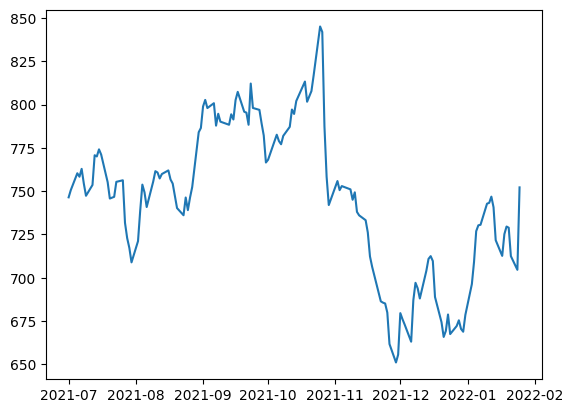

In [8]:
#DateIndex.index=pd.to_datetime(dataset["Date"],infer_datetime_format=True)
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

In [10]:
# Ensure the Date column is a DatetimeIndex
stk_data.index = pd.to_datetime(stk_data.index)

<Figure size 1600x800 with 0 Axes>

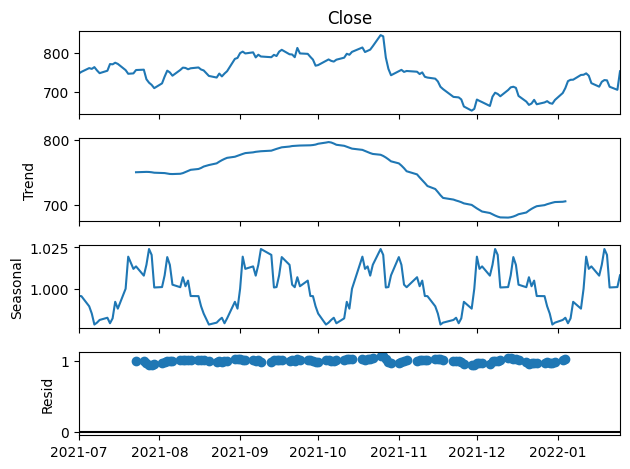

In [11]:
# Perform seasonal decomposition
result = seasonal_decompose(stk_data["Close"], model='multiplicative', period=30)  # Adjust period based on data seasonality

# Plot the result
plt.figure(figsize=(16, 8))
result.plot()
plt.show()

<Figure size 1600x800 with 0 Axes>

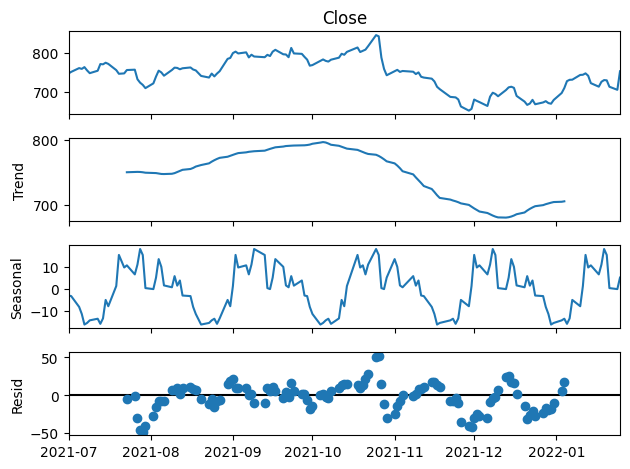

In [13]:
# Perform seasonal decomposition
result = seasonal_decompose(stk_data["Close"], model='additive', period=30)  # Adjust period based on data seasonality

# Plot the result
plt.figure(figsize=(16, 8))
result.plot()
plt.show()

In [14]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test

Results of Dickey-Fuller Test:
Test Statistic                  -1.816817
p-value                          0.372145
#Lags Used                       2.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


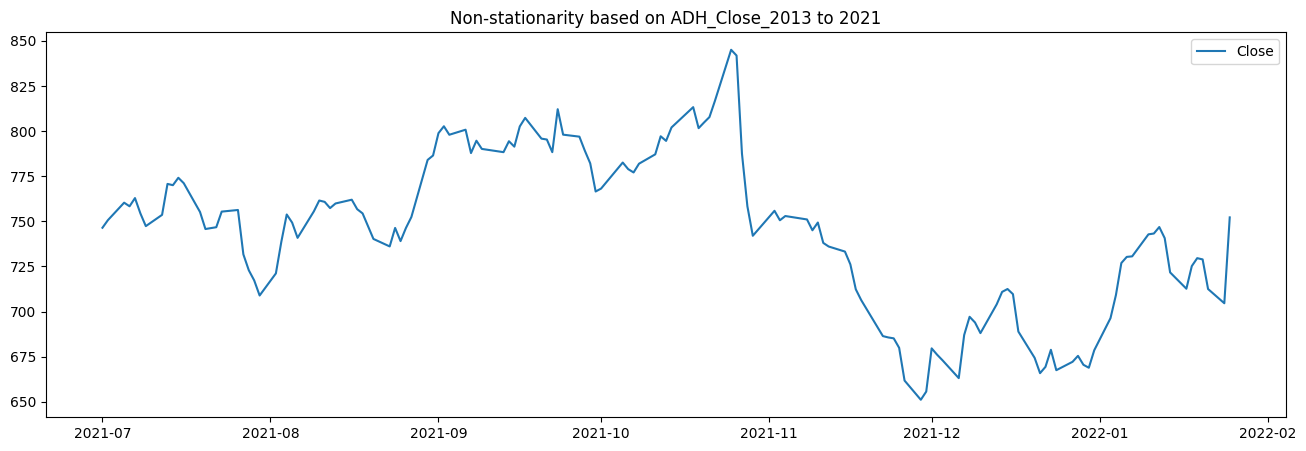

'Non-stationarity based on ADH'

In [15]:
adf_test(dataset["Close"],dataset,"Close")

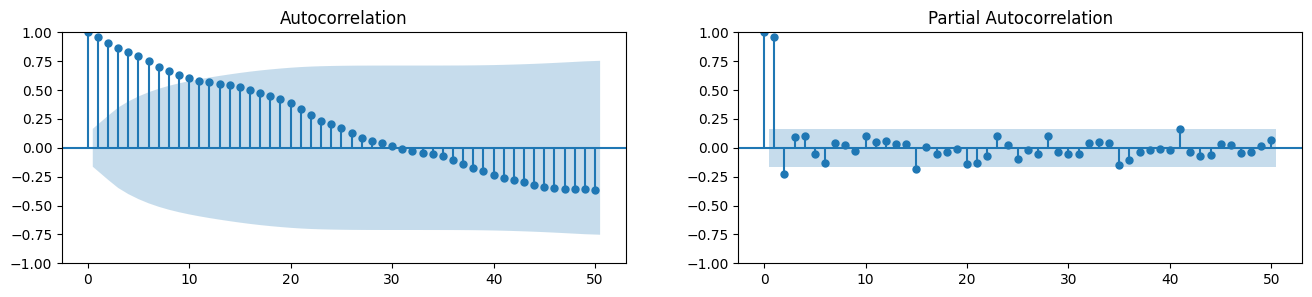

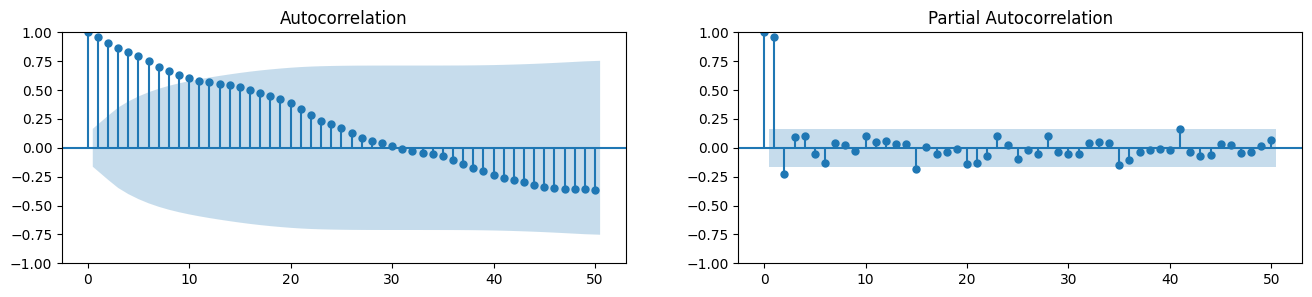

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

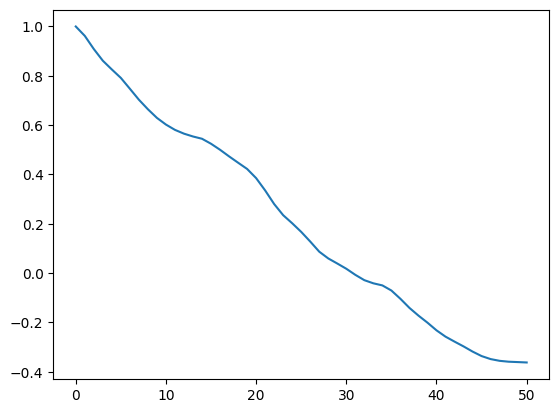

In [17]:
plt.plot(acf(dataset["Close"],nlags=50))

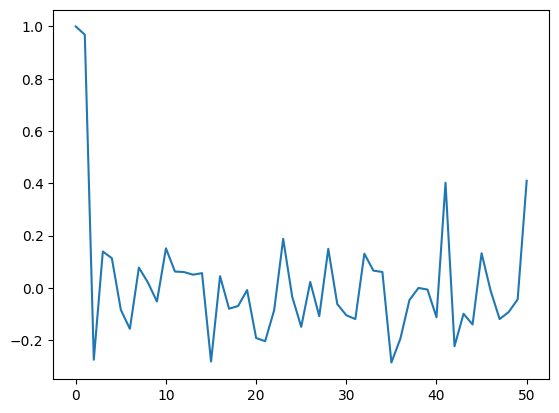

In [18]:
plt.plot(pacf(dataset["Close"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

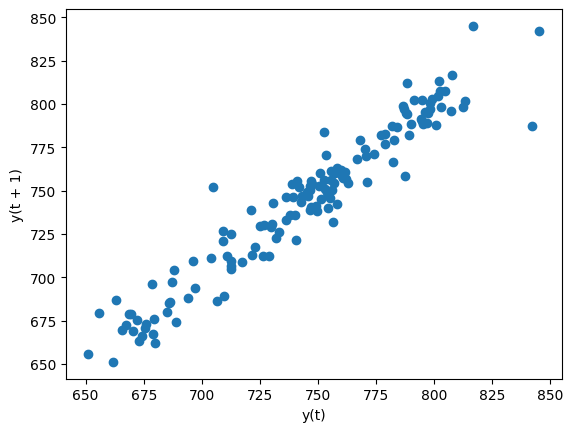

In [19]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

In [20]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

#Forecastability
#Apen small- Forecastability is possible
#Spen Small-Forecastability is possible

In [22]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.7558666560464213


C:\Users\sreet\AppData\Local\Temp\ipykernel_5276\1310478104.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


In [23]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [24]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.8681959780248202


C:\Users\sreet\AppData\Local\Temp\ipykernel_5276\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
